In [414]:
import quandl
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score



In [379]:
get_data = quandl.get("BSE/BOM500470", authtoken="ztPvYhhHNiFgvTtxU7Q3",parse_dates=["Date"])
data = get_data.reset_index() # loading into a new dataframe

In [432]:
data.to_csv(r'Stock_data.csv', index = False, header = True)
data.head


<bound method NDFrame.head of            Date    Open    High     Low   Close     WAP  No. of Shares  \
0    1991-01-02  145.00  145.00  130.00  137.50    0.00            0.0   
1    1991-01-03  137.50  140.00  135.00  140.00    0.00            0.0   
2    1991-01-07  142.50  145.00  137.50  145.00    0.00            0.0   
3    1991-01-09  145.00  145.00  141.25  143.75    0.00            0.0   
4    1991-01-11  142.00  155.00  140.00  150.00    0.00            0.0   
...         ...     ...     ...     ...     ...     ...            ...   
7089 2020-04-23  270.00  278.90  269.20  270.35  274.71       743463.0   
7090 2020-04-24  266.40  273.80  264.25  267.80  270.31       639828.0   
7091 2020-04-27  272.75  276.85  270.50  271.70  273.33       556593.0   
7092 2020-04-28  272.55  275.40  269.65  273.55  272.55       320699.0   
7093 2020-04-29  274.45  286.00  271.40  282.50  282.08       907065.0   

      No. of Trades  Total Turnover  Deliverable Quantity  \
0               0.0 

In [385]:
df = pd.read_csv("Stock_data.csv",encoding = 'unicode_escape', engine ='python')
df.head()
#data = data.reset_index()
#print([['Open', 'Date']])

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
0,1991-01-02,145.0,145.0,130.00,137.50,0.0,0.0,0.0,0.0,NaN,NaN,15.00,-7.50
1,1991-01-03,137.5,140.0,135.00,140.00,0.0,0.0,0.0,0.0,NaN,NaN,5.00,2.50
2,1991-01-07,142.5,145.0,137.50,145.00,0.0,0.0,0.0,0.0,NaN,NaN,7.50,2.50
3,1991-01-09,145.0,145.0,141.25,143.75,0.0,0.0,0.0,0.0,NaN,NaN,3.75,-1.25
4,1991-01-11,142.0,155.0,140.00,150.00,0.0,0.0,0.0,0.0,NaN,NaN,15.00,8.00


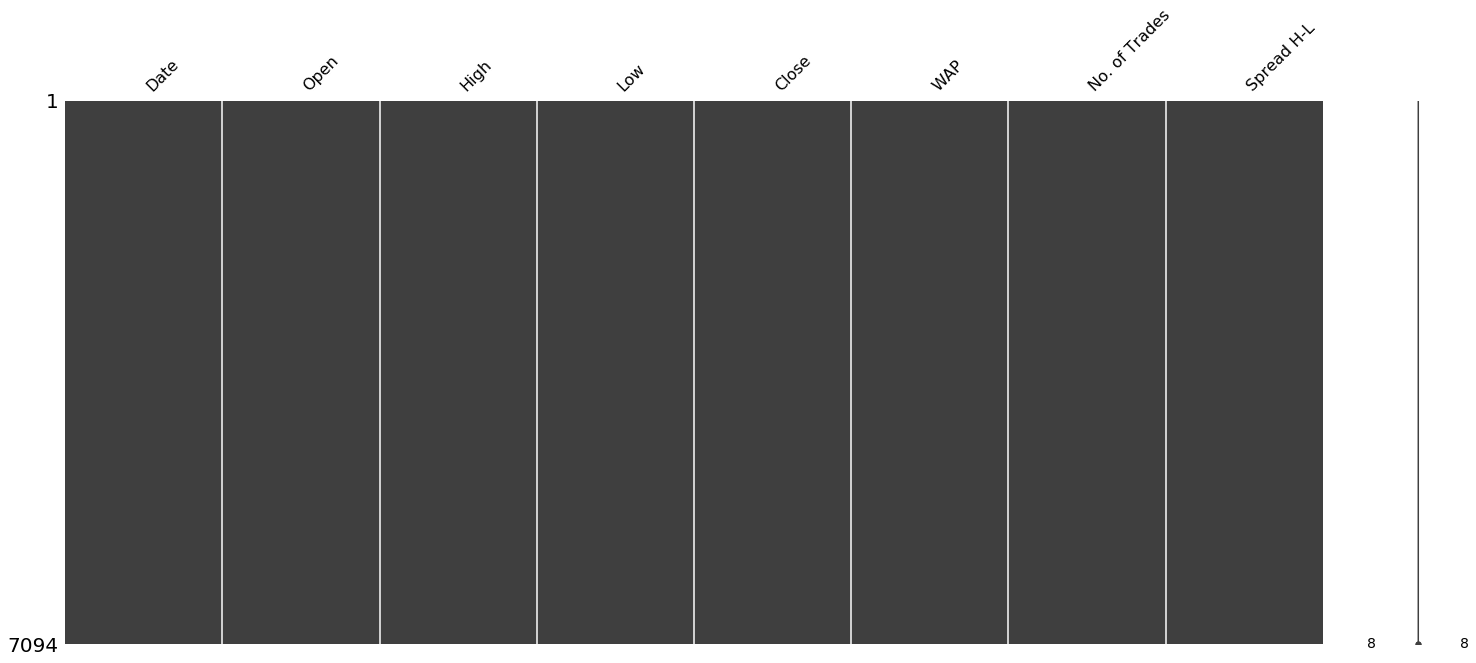

In [387]:
df.isnull().sum()

Date                            0
Open                            0
High                            0
Low                             0
Close                           0
WAP                             0
No. of Shares                   0
No. of Trades                   0
Total Turnover                  0
Deliverable Quantity         2584
% Deli. Qty to Traded Qty    2584
Spread H-L                      0
Spread C-O                      0
dtype: int64

In [388]:
#data columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'WAP', 'No. of Shares',
       'No. of Trades', 'Total Turnover', 'Deliverable Quantity',
       '% Deli. Qty to Traded Qty', 'Spread H-L', 'Spread C-O'],
      dtype='object')

In [389]:
#lets make Date as index
df.set_index("Date",inplace=True)

In [390]:
df.index
df

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
1991-01-02,145.00,145.00,130.00,137.50,0.00,0.0,0.0,0.0,NaN,NaN,15.00,-7.50
1991-01-03,137.50,140.00,135.00,140.00,0.00,0.0,0.0,0.0,NaN,NaN,5.00,2.50
1991-01-07,142.50,145.00,137.50,145.00,0.00,0.0,0.0,0.0,NaN,NaN,7.50,2.50
1991-01-09,145.00,145.00,141.25,143.75,0.00,0.0,0.0,0.0,NaN,NaN,3.75,-1.25
1991-01-11,142.00,155.00,140.00,150.00,0.00,0.0,0.0,0.0,NaN,NaN,15.00,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-23,270.00,278.90,269.20,270.35,274.71,743463.0,11439.0,204235538.0,248624.0,33.44,9.70,0.35
2020-04-24,266.40,273.80,264.25,267.80,270.31,639828.0,7672.0,172948877.0,208949.0,32.66,9.55,1.40
2020-04-27,272.75,276.85,270.50,271.70,273.33,556593.0,9488.0,152133568.0,185151.0,33.26,6.35,-1.05


In [391]:
df.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
1991-01-02,145.0,145.0,130.00,137.50,0.0,0.0,0.0,0.0,NaN,NaN,15.00,-7.50
1991-01-03,137.5,140.0,135.00,140.00,0.0,0.0,0.0,0.0,NaN,NaN,5.00,2.50
1991-01-07,142.5,145.0,137.50,145.00,0.0,0.0,0.0,0.0,NaN,NaN,7.50,2.50
1991-01-09,145.0,145.0,141.25,143.75,0.0,0.0,0.0,0.0,NaN,NaN,3.75,-1.25
1991-01-11,142.0,155.0,140.00,150.00,0.0,0.0,0.0,0.0,NaN,NaN,15.00,8.00


In [392]:
#lets see date for the month of January and february
df["2009-01":"2009-02"]

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2009-01-01,218.40,229.80,218.00,228.75,225.597619,2486488.0,36677.0,5.609458e+08,530782.0,21.35,11.80,10.35
2009-01-02,231.00,235.50,226.55,229.65,232.340284,2379435.0,35790.0,5.528386e+08,366571.0,15.41,8.95,-1.35
2009-01-05,235.00,248.00,232.50,245.10,240.043771,3533844.0,47463.0,8.482772e+08,593414.0,16.79,15.50,10.10
2009-01-06,248.10,252.10,238.50,246.75,246.744374,3400463.0,49954.0,8.390451e+08,257372.0,7.57,13.60,-1.35
2009-01-07,245.00,260.00,230.25,233.65,247.655479,4583832.0,59732.0,1.135211e+09,621592.0,13.56,29.75,-11.35
2009-01-09,225.10,235.70,208.30,214.50,217.607594,3868864.0,45469.0,8.418942e+08,902708.0,23.33,27.40,-10.60
2009-01-12,212.00,216.50,198.95,200.30,204.367555,3127969.0,43075.0,6.392554e+08,739336.0,23.64,17.55,-11.70
2009-01-13,199.00,208.05,191.20,202.85,199.284290,3678219.0,53685.0,7.330113e+08,361655.0,9.83,16.85,3.85
2009-01-14,203.00,215.80,203.00,213.45,211.913071,2264038.0,34662.0,4.797792e+08,260346.0,11.50,12.80,10.45


In [283]:
#lets see data of January only
df["2009-02":"2009-03"]

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2009-02-02,181.00,183.25,171.45,172.40,175.949870,1935305.0,28658.0,3.405167e+08,514501.0,26.59,11.80,-8.60
2009-02-03,174.00,177.40,167.70,170.70,172.434108,2337423.0,34362.0,4.030514e+08,235194.0,10.06,9.70,-3.30
2009-02-04,172.30,181.00,172.30,179.15,177.978932,2433845.0,35485.0,4.331731e+08,412406.0,16.94,8.70,6.85
2009-02-05,181.00,188.30,180.00,182.00,184.239883,2686410.0,38901.0,4.949439e+08,455021.0,16.94,8.30,1.00
2009-02-06,184.40,187.95,184.00,186.15,186.005264,1563512.0,23269.0,2.908215e+08,192983.0,12.34,3.95,1.75
2009-02-09,188.40,200.65,187.00,199.55,196.396750,3441362.0,45622.0,6.758723e+08,574864.0,16.70,13.65,11.15
2009-02-10,197.65,203.95,194.50,196.95,198.705671,4677994.0,51591.0,9.295439e+08,663532.0,14.18,9.45,-0.70
2009-02-11,193.90,193.90,187.25,190.30,190.088764,2689832.0,36974.0,5.113068e+08,247559.0,9.20,6.65,-3.60
2009-02-12,188.25,191.80,184.15,185.45,187.784646,1953040.0,29058.0,3.667509e+08,423744.0,21.70,7.65,-2.80


In [393]:
df.sort_index(inplace=True)
df_jan=df["2009-01":"2009-02"] #January data in sorted way

In [394]:
df_jan #january dataset created for see the trend in January

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2009-01-01,218.40,229.80,218.00,228.75,225.597619,2486488.0,36677.0,5.609458e+08,530782.0,21.35,11.80,10.35
2009-01-02,231.00,235.50,226.55,229.65,232.340284,2379435.0,35790.0,5.528386e+08,366571.0,15.41,8.95,-1.35
2009-01-05,235.00,248.00,232.50,245.10,240.043771,3533844.0,47463.0,8.482772e+08,593414.0,16.79,15.50,10.10
2009-01-06,248.10,252.10,238.50,246.75,246.744374,3400463.0,49954.0,8.390451e+08,257372.0,7.57,13.60,-1.35
2009-01-07,245.00,260.00,230.25,233.65,247.655479,4583832.0,59732.0,1.135211e+09,621592.0,13.56,29.75,-11.35
2009-01-09,225.10,235.70,208.30,214.50,217.607594,3868864.0,45469.0,8.418942e+08,902708.0,23.33,27.40,-10.60
2009-01-12,212.00,216.50,198.95,200.30,204.367555,3127969.0,43075.0,6.392554e+08,739336.0,23.64,17.55,-11.70
2009-01-13,199.00,208.05,191.20,202.85,199.284290,3678219.0,53685.0,7.330113e+08,361655.0,9.83,16.85,3.85
2009-01-14,203.00,215.80,203.00,213.45,211.913071,2264038.0,34662.0,4.797792e+08,260346.0,11.50,12.80,10.45


/Users/mansiudani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


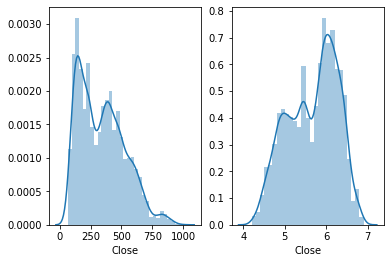

In [395]:
fig, ax =plt.subplots(1,2)
sns.distplot(df['Close'], ax=ax[0])
#sns.distplot(df['bowling'], ax=ax[1])
seabornInstance.distplot((helpful_log),ax=ax[1])
fig.show()
#sns.distplot(df["Close"])

In [396]:
df.index = pd.to_datetime(df.index)

In [397]:
#resmapling data on a monthly frequency with avg close price every month end
df.Close.resample("M").mean()

Date
1991-01-31    141.250000
1991-02-28    158.970588
1991-03-31    165.333333
1991-04-30    172.725000
1991-05-31    186.882353
                 ...    
2019-12-31    434.085714
2020-01-31    476.900000
2020-02-29    436.982500
2020-03-31    306.092857
2020-04-30    276.023529
Freq: M, Name: Close, Length: 352, dtype: float64

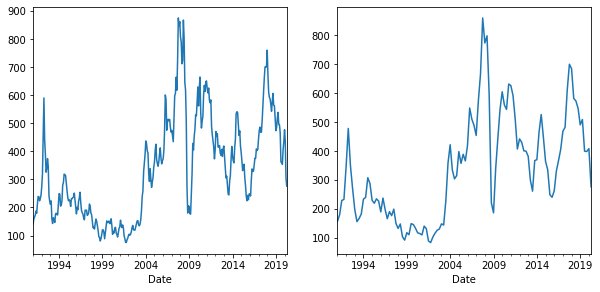

In [398]:
#plotting the above data to see the trend
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
df.Close.resample("M").mean().plot()
plt.subplot(2,2,2)
#lets plot data quarterly
df.Close.resample("Q").mean().plot()

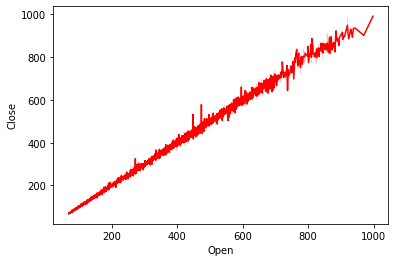

In [399]:
sns.lineplot(df["Open"],df["Close"],data=df,color="r")

In [400]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'WAP', 'No. of Shares', 'No. of Trades',
       'Total Turnover', 'Deliverable Quantity', '% Deli. Qty to Traded Qty',
       'Spread H-L', 'Spread C-O'],
      dtype='object')

In [401]:
#feature correlation
df1=df[["Close","Open","High","Low","Spread H-L", "Spread C-O", "WAP", "No. of Trades"]]
df1.corr()

,Close,Open,High,Low,Spread H-L,Spread C-O,WAP,No. of Trades
Close,1.000000,0.998583,0.999385,0.999349,0.611007,-0.001025,0.913914,0.372546
Open,0.998583,1.000000,0.999364,0.999147,0.614116,-0.054239,0.913699,0.370393
High,0.999385,0.999364,1.000000,0.998974,0.628394,-0.027245,0.914070,0.379182
Low,0.999349,0.999147,0.998974,1.000000,0.592520,-0.023828,0.913624,0.362461
Spread H-L,0.611007,0.614116,0.628394,0.592520,1.000000,-0.075321,0.565933,0.518804
Spread C-O,-0.001025,-0.054239,-0.027245,-0.023828,-0.075321,1.000000,-0.021237,0.030163
WAP,0.913914,0.913699,0.914070,0.913624,0.565933,-0.021237,1.000000,0.459523
No. of Trades,0.372546,0.370393,0.379182,0.362461,0.518804,0.030163,0.459523,1.000000


In [402]:
#dropping of unrelated and unnecessary items
df.drop(labels = ['Spread C-O','No. of Shares','Total Turnover', 'Deliverable Quantity', '% Deli. Qty to Traded Qty'], axis = 1, inplace = True)
df.head()

,Open,High,Low,Close,WAP,No. of Trades,Spread H-L
Date,,,,,,,
1991-01-02,145.0,145.0,130.00,137.50,0.0,0.0,15.00
1991-01-03,137.5,140.0,135.00,140.00,0.0,0.0,5.00
1991-01-07,142.5,145.0,137.50,145.00,0.0,0.0,7.50
1991-01-09,145.0,145.0,141.25,143.75,0.0,0.0,3.75
1991-01-11,142.0,155.0,140.00,150.00,0.0,0.0,15.00


In [403]:
#Data is highly correlated hence it will give us a bad model so use only 1 feature
#X=df.drop('Close','Open','Low','Spread C-O','WAP','No. of Shares',inplace = True)
#X = df.drop(labels = [], axis = 1, inplace = True)
df = df.reset_index()
df.head()
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'WAP', 'No. of Trades',
       'Spread H-L'],
      dtype='object')

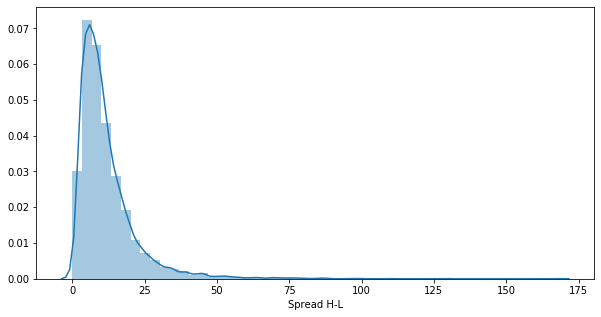

In [404]:
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
plt.figure(figsize=(10,5))
plt.tight_layout()
seabornInstance.distplot(df['Spread H-L'])

In [405]:
#df.head() #LOG 
helpful_log= np.log(df['Close'])
helpful_log.describe()
#df.head()

count    7094.000000
mean        5.670379
std         0.593996
min         4.206929
25%         5.178971
50%         5.784517
75%         6.151349
max         6.898311
Name: Close, dtype: float64

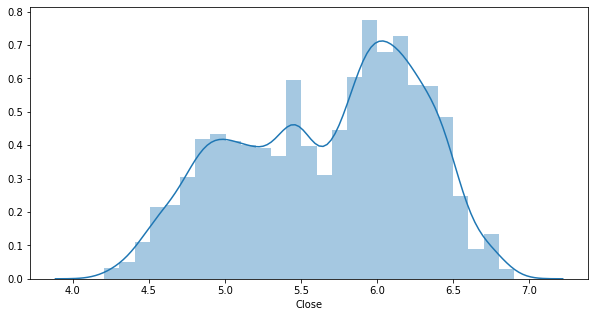

In [406]:
plt.figure(figsize=(10,5))
plt.tight_layout()
seabornInstance.distplot(helpful_log)

In [407]:
#feature correlation
df1=df[[ 'Open', 'High', 'Low', 'Close', 'WAP', 'No. of Trades','Spread H-L']]
df1.corr()

,Open,High,Low,Close,WAP,No. of Trades,Spread H-L
Open,1.000000,0.999364,0.999147,0.998583,0.913699,0.370393,0.614116
High,0.999364,1.000000,0.998974,0.999385,0.914070,0.379182,0.628394
Low,0.999147,0.998974,1.000000,0.999349,0.913624,0.362461,0.592520
Close,0.998583,0.999385,0.999349,1.000000,0.913914,0.372546,0.611007
WAP,0.913699,0.914070,0.913624,0.913914,1.000000,0.459523,0.565933
No. of Trades,0.370393,0.379182,0.362461,0.372546,0.459523,1.000000,0.518804
Spread H-L,0.614116,0.628394,0.592520,0.611007,0.565933,0.518804,1.000000


In [408]:
df2=df[[ 'Open', 'Low','WAP', 'No. of Trades','Spread H-L']]

In [409]:
X=df2.drop('Spread H-L',axis=1)
y=df1['Spread H-L'].values
y=y.astype('float')

In [410]:
#train test and split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)


In [411]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [412]:
y_pred=lreg.predict(X_test)
y_pred

array([ 5.9604569 ,  7.48437548,  7.78384715, ...,  4.16271019,
        8.32274236, 16.01975053])

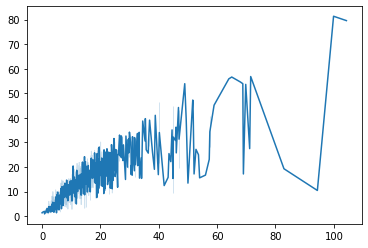

In [413]:
sns.lineplot(y_test,y_pred)

In [415]:
lreg.score(X_test,y_test)

0.6674272930453365

In [422]:
#to add into results_index for evaluation of error term 
def Evaluationmatrix_dict(y_true, y_predict, name = 'Linear - Integer'):
    dict_matrix = {}
    dict_matrix['Series Name'] = name
    dict_matrix['Mean Squared Error'] = metrics.mean_squared_error(y_true,y_predict)
    dict_matrix['Mean Absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
    dict_matrix['Mean Squared Log Error'] = metrics.mean_squared_log_error(y_true,y_predict)
    return dict_matrix

In [423]:
#for evaluation of error term and 
def Evaluationmatrix(y_true, y_predict):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_true,y_predict)))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_true,y_predict)))
    print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_true,y_predict)))

In [424]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)
resultsdf = pd.DataFrame()
resultsdf = resultsdf.from_dict(Evaluationmatrix_dict(y_test,Results),orient = 'index')
resultsdf = resultsdf.transpose()

In [425]:
resultsdf

,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error
0,Linear - Integer,38.2703,3.50437,0.131696


In [428]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test), 2))

Mean absolute error = 0.0
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 1.0
R2 score = 1.0
